# In this example, two versions of a website's call-to-action button were tested: the original button (Group A) and a new button (Group B). By randomly assigning visitors to either group and comparing the conversion rate and revenue per conversion for each group, we can determine which button performs better in terms of these metrics

In [37]:
import pandas as pd

# Create a list of dictionaries where each dictionary represents a row in the data
data = [
    {'Date': '1/1', 'Group': 'A', 'Visitors': 100, 'Conversions': 10, 'Revenue': 1000},
    {'Date': '1/2', 'Group': 'A', 'Visitors': 120, 'Conversions': 12, 'Revenue': 1140},
    {'Date': '1/3', 'Group': 'A', 'Visitors': 90, 'Conversions': 9, 'Revenue': 810},
    {'Date': '1/1', 'Group': 'B', 'Visitors': 110, 'Conversions': 14, 'Revenue': 980},
    {'Date': '1/2', 'Group': 'B', 'Visitors': 130, 'Conversions': 16, 'Revenue': 1140},
    {'Date': '1/3', 'Group': 'B', 'Visitors': 100, 'Conversions': 12, 'Revenue': 960},
    {'Date': '1/4', 'Group': 'B', 'Visitors': 70, 'Conversions': 13, 'Revenue': 1400},
    {'Date': '1/2', 'Group': 'B', 'Visitors': 340, 'Conversions': 31, 'Revenue': 1960},
    {'Date': '1/5', 'Group': 'A', 'Visitors': 78, 'Conversions': 21, 'Revenue': 1960},
    {'Date': '1/4', 'Group': 'A', 'Visitors': 100, 'Conversions': 22, 'Revenue': 1060},
    {'Date': '1/6', 'Group': 'A', 'Visitors': 230, 'Conversions': 17, 'Revenue': 2100},
    {'Date': '1/1', 'Group': 'A', 'Visitors': 150, 'Conversions': 9, 'Revenue': 1880},
    {'Date': '1/7', 'Group': 'B', 'Visitors': 120, 'Conversions': 21, 'Revenue': 1960},
    {'Date': '1/7', 'Group': 'A', 'Visitors': 220, 'Conversions': 51, 'Revenue': 2960},
    {'Date': '1/7', 'Group': 'B', 'Visitors': 30, 'Conversions': 5, 'Revenue': 160},
    {'Date': '1/6', 'Group': 'B', 'Visitors': 320, 'Conversions': 41, 'Revenue': 2360},
    {'Date': '1/6', 'Group': 'A', 'Visitors': 210, 'Conversions': 19, 'Revenue': 750},
    {'Date': '1/7', 'Group': 'B', 'Visitors': 120, 'Conversions': 21, 'Revenue': 1960},
    {'Date': '1/6', 'Group': 'A', 'Visitors': 212, 'Conversions': 34, 'Revenue': 2760}
]

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(data)

# Print the DataFrame
print(df)


   Date Group  Visitors  Conversions  Revenue
0   1/1     A       100           10     1000
1   1/2     A       120           12     1140
2   1/3     A        90            9      810
3   1/1     B       110           14      980
4   1/2     B       130           16     1140
5   1/3     B       100           12      960
6   1/4     B        70           13     1400
7   1/2     B       340           31     1960
8   1/5     A        78           21     1960
9   1/4     A       100           22     1060
10  1/6     A       230           17     2100
11  1/1     A       150            9     1880
12  1/7     B       120           21     1960
13  1/7     A       220           51     2960
14  1/7     B        30            5      160
15  1/6     B       320           41     2360
16  1/6     A       210           19      750
17  1/7     B       120           21     1960
18  1/6     A       212           34     2760


# 1. What is the overall conversion rate for each group.

In [47]:
# group A
group_a_visitors = sum([row['Visitors'] for row in data if row['Group'] == 'A'])
group_a_conversions = sum([row['Conversions'] for row in data if row['Group'] == 'A'])
group_a_conversion_rate = group_a_conversions / group_a_visitors
print("Conversion rate for Group A :", group_a_conversion_rate)

# group B
group_b_visitors = sum([row['Visitors'] for row in data if row['Group'] == 'B'])
group_b_conversions = sum([row['Conversions'] for row in data if row['Group'] == 'B'])
group_b_conversion_rate = group_b_conversions / group_b_visitors
print("Conversion rate for Group B :", group_b_conversion_rate)


Conversion rate for Group A : 0.13509933774834437
Conversion rate for Group B : 0.12985074626865672


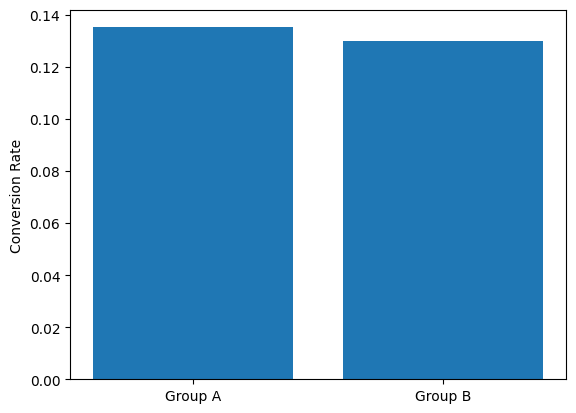

In [40]:
import matplotlib.pyplot as plt

# Create a bar chart
plt.bar(['Group A', 'Group B'], [group_a_conversion_rate, group_b_conversion_rate])
plt.ylabel('Conversion Rate')

# Show the chart
plt.show()


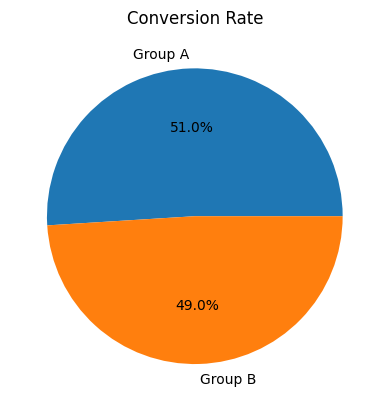

In [41]:
import matplotlib.pyplot as plt

# Create a donut chart
fig, ax = plt.subplots()
ax.pie([group_a_conversion_rate, group_b_conversion_rate], labels= ['Group A','Group B'],autopct='%1.1f%%')
ax.set_title("Conversion Rate")
plt.show()


# 2. What is the overall revenue per conversion for each group?
#To calculate the overall revenue per conversion for each group, we need to divide the total revenue by the total number of conversions for each group.

In [42]:
# group A
group_a_revenue = sum([row['Revenue'] for row in data if row['Group'] == 'A'])
group_a_revenue_per_conversion = group_a_revenue / group_a_conversions
print("Revenue per conversion for Group A :", group_a_revenue_per_conversion)

# group B
group_b_revenue = sum([row['Revenue'] for row in data if row['Group'] == 'B'])
group_b_revenue_per_conversion = group_b_revenue / group_b_conversions
print("Revenue per conversion for Group B :", group_b_revenue_per_conversion)

# So, Group A has a revenue per conversion of $80.5 and Group B has a revenue per conversion of $74


Revenue per conversion for Group A : 80.49019607843137
Revenue per conversion for Group B : 74.02298850574712


# 3. How does conversion rate and revenue per conversion change over time for each group?

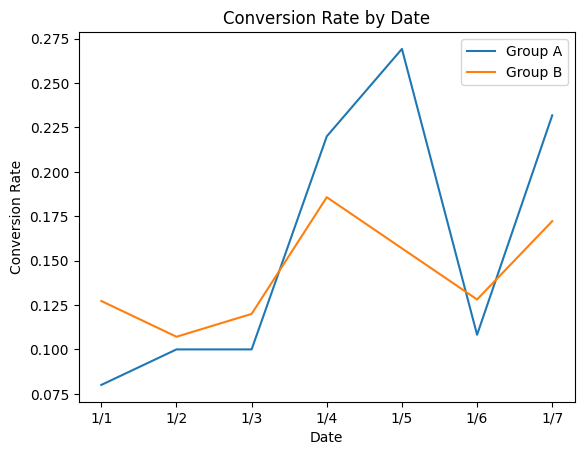

In [48]:
df = pd.DataFrame(data)
df["Conversion Rate"] = df["Conversions"]/df["Visitors"]
df["Revenue per Conversion"] = df["Revenue"]/df["Conversions"]

#grouping by date and calculating average conversion rate and revenue per conversion for each date
df_grouped = df.groupby(['Date','Group']).mean().reset_index()

#line graph for conversion rate
plt.plot(df_grouped[df_grouped['Group']=='A']['Date'], df_grouped[df_grouped['Group']=='A']['Conversion Rate'], label = 'Group A')
plt.plot(df_grouped[df_grouped['Group']=='B']['Date'], df_grouped[df_grouped['Group']=='B']['Conversion Rate'], label = 'Group B')
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate by Date')
plt.legend()
plt.show()


# 4. Is there a significant difference in conversion rate and revenue per conversion between group A and group B?
#To determine if there is a significant difference in conversion rate and revenue per conversion between group A and group B, you can use a statistical hypothesis test. A common test used for comparing two proportions is the two-sample proportion z-test. The null hypothesis of the test is that there is no difference in conversion rate or revenue per conversion between the two groups, while the alternative hypothesis is that there is a difference.

In [44]:
from statsmodels.stats import proportion as prop

# Group A
group_a_visitors = sum([row['Visitors'] for row in data if row['Group'] == 'A'])
group_a_conversions = sum([row['Conversions'] for row in data if row['Group'] == 'A'])

# Group B
group_b_visitors = sum([row['Visitors'] for row in data if row['Group'] == 'B'])
group_b_conversions = sum([row['Conversions'] for row in data if row['Group'] == 'B'])

# Perform the z-test
z_test = prop.proportions_ztest([group_a_conversions, group_b_conversions], [group_a_visitors, group_b_visitors], alternative='two-sided')

# Print the p-value
print("p-value:", z_test[1])


# This will output the p-value, which is the probability of observing the test statistic or a more extreme value assuming the 
# null hypothesis is true. If the p-value is less than a significance level of 0.05, we can reject the null hypothesis and conclude 
# that there is a significant difference in conversion rate between group A and group B.You can perform a similar test for Revenue per conversion.


p-value: 0.6801038200888502


# 5. How does the revenue per conversion of group A compare to group B on a specific date?

In [45]:
# group the data by date and group and calculate the average revenue per conversion
df_grouped = df.groupby(['Date','Group']).mean().reset_index()

# select a specific date
date = '1/2'

# select the data for the specific date
data_date = df_grouped[df_grouped['Date']==date]

#print the revenue per conversion for group A and group B
print("Revenue per conversion for Group A on ", date, ":", data_date[data_date['Group']=='A']['Revenue per Conversion'].values)
print("Revenue per conversion for Group B on ", date, ":", data_date[data_date['Group']=='B']['Revenue per Conversion'].values)


Revenue per conversion for Group A on  1/2 : [95.]
Revenue per conversion for Group B on  1/2 : [67.23790323]


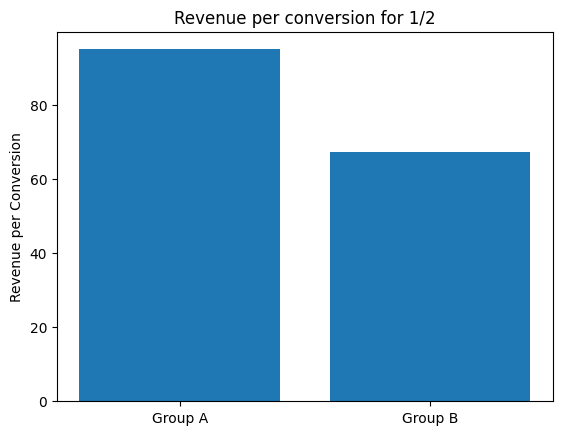

In [46]:
plt.bar(['Group A', 'Group B'], [data_date[data_date['Group']=='A']['Revenue per Conversion'].values[0], data_date[data_date['Group']=='B']['Revenue per Conversion'].values[0]], align='center')
plt.ylabel('Revenue per Conversion')
plt.title("Revenue per conversion for " + date)
plt.show()
